In [19]:
########################################################################
# Author    : A. Alsema, J. Kotah
# Date      : February 2024
# Dataset   : Visium Spatial Transcriptomics for MS lesions, 15 slices with WM 
# Purpose   : plot single genes/features over pseudotime UMAP. 
# Output    : figure panels corresponding to fig 6c, e, g, i, k, m
# Input     : subtrajectories 1-3 as cds objects
########################################################################

rm(list = ls())

library(monocle3)
library(ggplot2)
library(dplyr)
library(ggplot2)
library(Matrix)
require(RColorBrewer)
require(gplots)
require(qpcR)
library(Matrix)
library(monocle3)
library(ggplot2)
library(dplyr)
library(cowplot)
library(RColorBrewer)


In [2]:
setwd('/data/bcn/Datasets/ST_AAL_JK_WM/')
outdir = "/data/bcn/p310674/Documents/010_AAL_ST_Pseuodotime/Outputs/A_5-5_"


In [24]:
#total traj
cds_total <- readRDS("RData/monocle3/3.monocle_traj_WM_allgenes.rds")
cds_total

class: cell_data_set 
dim: 33538 55084 
metadata(1): cds_version
assays(1): counts
rownames(33538): MIR1302-2HG FAM138A ... AC213203.1 FAM231C
rowData names(1): gene_short_name
colnames(55084): AAACAAGTATCTCCCA-1_1 AAACACCAATAACTGC-1_1 ...
  TTGTTTCCATACAACT-1_15 TTGTTTGTGTAAATTC-1_15
colData names(29): seu_integrated_barcode orig.ident ... UMAP1_monoc
  UMAP2_monoc
reducedDimNames(1): UMAP
mainExpName: NULL
altExpNames(0):

# 1. plot traject over total pseudotime UMAP

### Subtrajectory 1 (to rims)

In [4]:
branch_name = "4-4_startnode_to_rim"
cds <- readRDS("RData/monocle3/subtraj_4-4.startnode_to_rims-microglia_graph.rds")
print("number of spots")
ncol(cds)

[1] "number of spots"


[1] 16734

Cells aren't colored in a way that allows them to be grouped.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


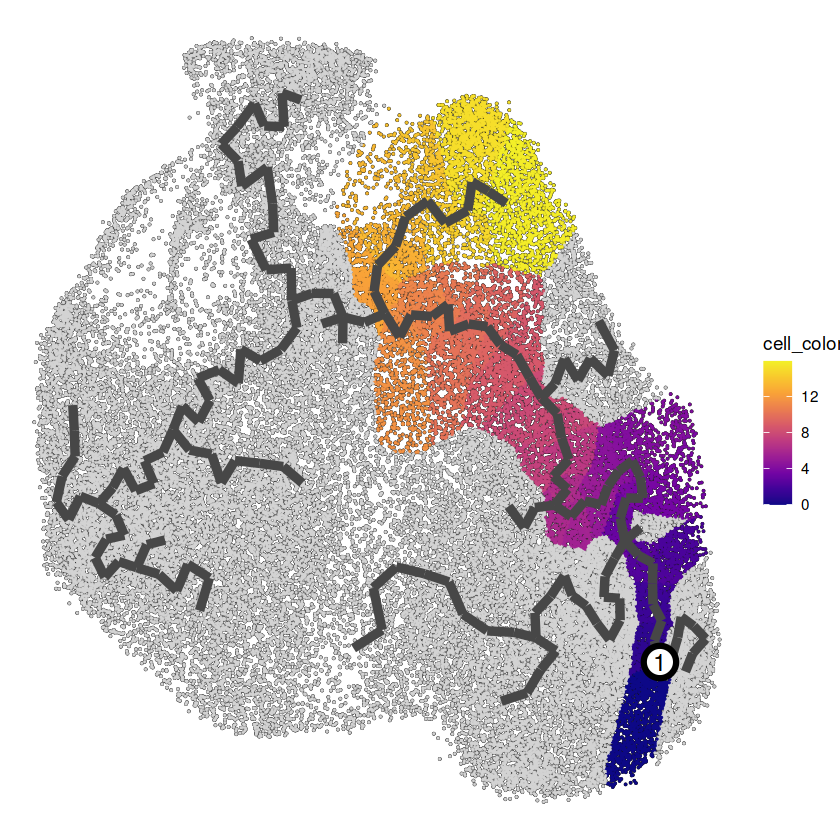

In [6]:
colData(cds_total)$conditional_pseudotime = case_when(colData(cds_total)$seu_integrated_barcode %in% colnames(cds) ~ colData(cds_total)$Pseudotime,
                                                      T ~ NA)
                                                      
#colfunc <- colorRampPalette(c("lightgrey", "lemonchiffon1", "lemonchiffon2","tan1", "firebrick2", "firebrick3"))             
colfunc <- colorRampPalette(c("#0d0887", "#6c00a8", "#b52e8c","#e3695e", "#fcab33", "#f3f027"))             

expression_cols <- colfunc(10)

plot_cells(cds_total, label_principal_points = FALSE, color_cells_by = "conditional_pseudotime",
                   show_trajectory_graph=TRUE,
                   label_groups_by_cluster=FALSE,
                   label_leaves=FALSE,
                   label_roots = TRUE,
                   label_branch_points=FALSE,
                   trajectory_graph_segment_size = 2,
                   graph_label_size= 5) + 
                            theme_void() + 
                            scale_colour_gradientn(colours = expression_cols, na.value = "lightgrey") #+ 
                            #theme(legend.position = "none")


### Subtrajectory 2 (to active cores)

In [10]:
branch_name = "4-1_startnode_to_infl"
cds <- readRDS("RData/monocle3/subtraj_4-1.startnode_to_infl_graph.rds")
print("number of spots")
ncol(cds)

[1] "number of spots"


[1] 18154

Cells aren't colored in a way that allows them to be grouped.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


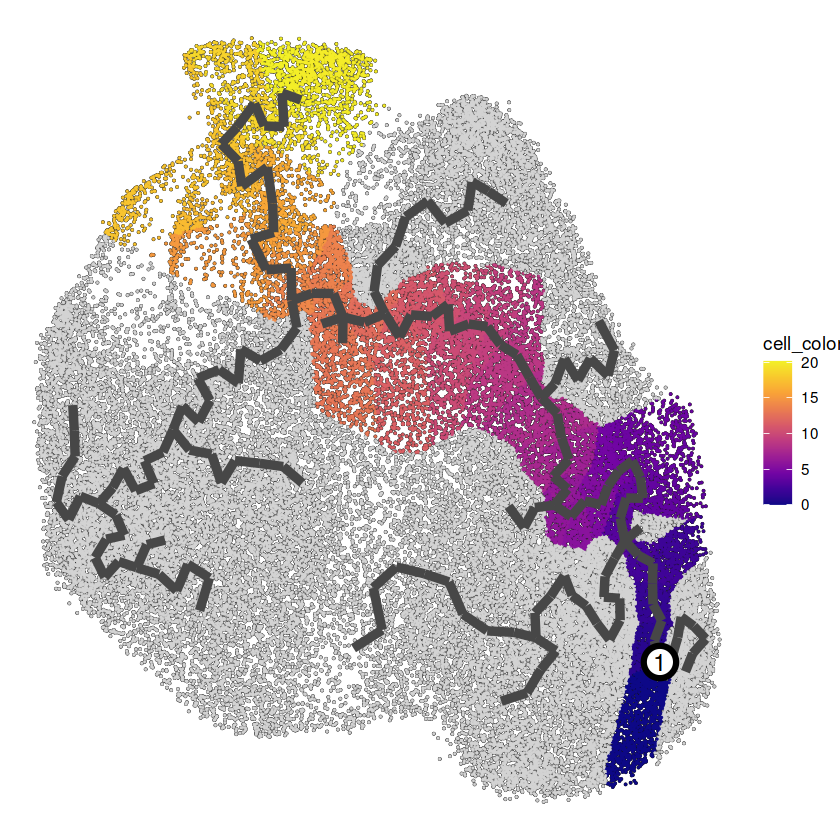

In [11]:
colData(cds_total)$conditional_pseudotime = case_when(colData(cds_total)$seu_integrated_barcode %in% colnames(cds) ~ colData(cds_total)$Pseudotime,
                                                      T ~ NA)
                                                      
#colfunc <- colorRampPalette(c("lightgrey", "lemonchiffon1", "lemonchiffon2","tan1", "firebrick2", "firebrick3"))             
colfunc <- colorRampPalette(c("#0d0887", "#6c00a8", "#b52e8c","#e3695e", "#fcab33", "#f3f027"))             

expression_cols <- colfunc(10)

plot_cells(cds_total, label_principal_points = FALSE, color_cells_by = "conditional_pseudotime",
                   show_trajectory_graph=TRUE,
                   label_groups_by_cluster=FALSE,
                   label_leaves=FALSE,
                   label_roots = TRUE,
                   label_branch_points=FALSE,
                   trajectory_graph_segment_size = 2,
                   graph_label_size= 5) + 
                            theme_void() + 
                            scale_colour_gradientn(colours = expression_cols, na.value = "lightgrey") #+ 
                            #theme(legend.position = "none")


### Subtrajectory 3 (to act/inact cores)

[1] "number of spots"


[1] 20717

Cells aren't colored in a way that allows them to be grouped.

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


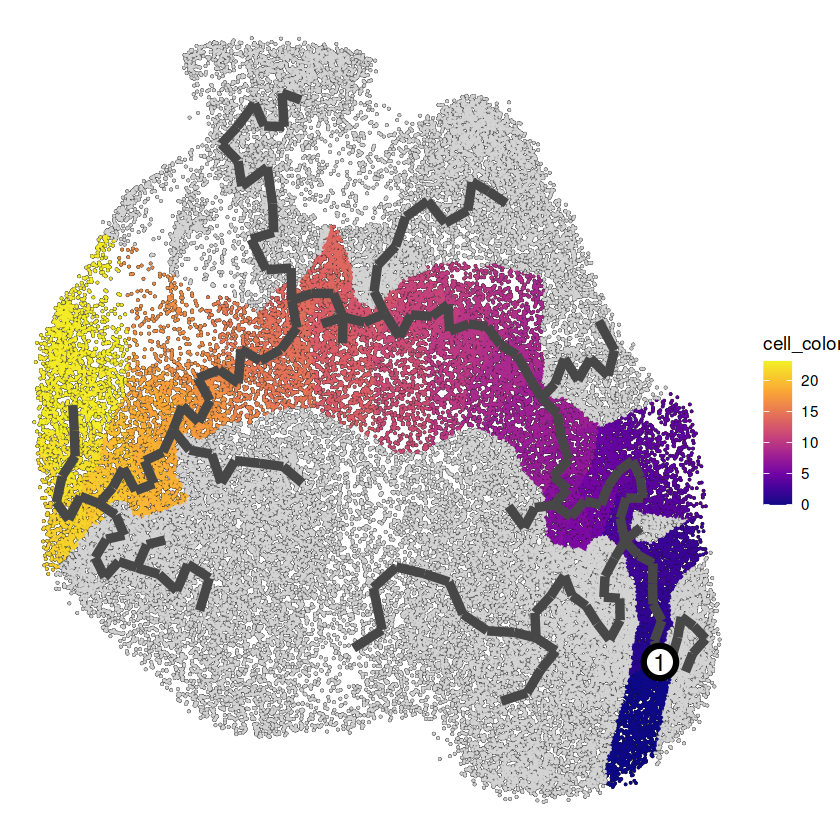

In [12]:
branch_name = "4-2_startnode_to_active_mixed_core"
cds <- readRDS("RData/monocle3/subtraj_4-2.startnode_to_active_mixed_graph.rds")
print("number of spots")
ncol(cds)

colData(cds_total)$conditional_pseudotime = case_when(colData(cds_total)$seu_integrated_barcode %in% colnames(cds) ~ colData(cds_total)$Pseudotime,
                                                      T ~ NA)
                                                      
#colfunc <- colorRampPalette(c("lightgrey", "lemonchiffon1", "lemonchiffon2","tan1", "firebrick2", "firebrick3"))             
colfunc <- colorRampPalette(c("#0d0887", "#6c00a8", "#b52e8c","#e3695e", "#fcab33", "#f3f027"))             

expression_cols <- colfunc(10)

plot_cells(cds_total, label_principal_points = FALSE, color_cells_by = "conditional_pseudotime",
                   show_trajectory_graph=TRUE,
                   label_groups_by_cluster=FALSE,
                   label_leaves=FALSE,
                   label_roots = TRUE,
                   label_branch_points=FALSE,
                   trajectory_graph_segment_size = 2,
                   graph_label_size= 5) + 
                            theme_void() + 
                            scale_colour_gradientn(colours = expression_cols, na.value = "lightgrey")

# 2. plotting single genes over total pseudotime UMAP

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


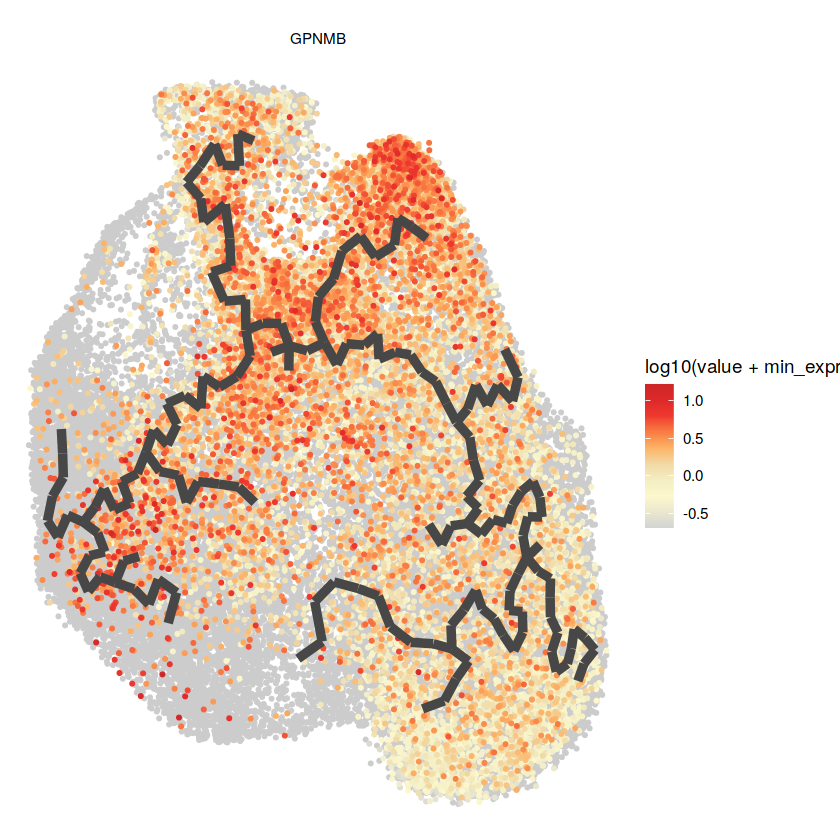

In [9]:
colfunc <- colorRampPalette(c("lightgrey", "lemonchiffon1", "lemonchiffon2","tan1", "firebrick2", "firebrick3"))             
expression_cols <- colfunc(10)

plot_cells(cds_total, genes=c("GPNMB"), # can use any other gene as desired
               show_trajectory_graph=TRUE,
               label_cell_groups=FALSE,
                label_roots = FALSE,
                label_branch_points=FALSE,
                trajectory_graph_segment_size = 2,
                cell_size = 0.8,
                scale_to_range = FALSE,
                graph_label_size= 5,
                label_leaves=FALSE) +
                            theme_void() + 
                            scale_colour_gradientn(colours = expression_cols) + 
                            ggtitle("")


In [31]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/bcn/p310674/anaconda3/envs/R_monocle/lib/libopenblasp-r0.3.23.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Amsterdam
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] cowplot_1.1.3               qpcR_1.4-1                 
 [3] robustbase_0.99-2           rgl_1.2.8                  
 [5] minpack.lm_1.2-4            MASS_7.3-60                
 [7] gplots_3.1.3